In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('new_products.csv')
df.head()

,product_id,seller_title,simple_score,avg_simple_score,weighted_score,avg_weighted_score
0,7602,برزان,112.047,350.146875,14.162069,44.256466
1,7602,برهان الکترونیک,3.001,300.100000,0.348276,34.827586
2,7602,به روز سنتر,10.003,500.150000,1.389655,69.482759
3,7602,جانبی انسی,32.012,320.120000,4.213793,42.137931
4,7602,جانبی حبیب,2.000,200.000000,0.241379,24.137931


In [7]:
products = pd.read_csv('digikala-products.csv')
products.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_11520\737072235.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  products = pd.read_csv('digikala-products.csv')


,id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,Seller,Is_Fake,min_price_last_month,sub_category
0,7096438,آبسلانگ مدل s5 بسته 250 عددی,90,4,آبسلانگ,NaN,متفرقه,634800,سلامت ساز راد,False,0,beauty
1,2845119,آبسلانگ مدل M-1 بسته 400 عددی,84,217,آبسلانگ,NaN,متفرقه,818800,مهر افزون,False,0,beauty
2,6117745,آبسلانگ مدل m50 مجموعه 500 عددی,88,14,آبسلانگ,NaN,متفرقه,920000,یانگوم,False,0,beauty
3,1912926,استند ابسلانگ مدل S01,78,25,آبسلانگ,NaN,متفرقه,1100000,بهراد طب بیدار,False,0,beauty
4,6335462,آبسلانگ نوری تسلامد مدل All-in-One,84,25,آبسلانگ,NaN,تسلا مد,1530000,دیجی‌کالا,False,0,beauty


In [8]:
products.rename(columns={'id':'product_id', 'Seller':'seller_title'}, inplace=True)
products.head()

,product_id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,seller_title,Is_Fake,min_price_last_month,sub_category
0,7096438,آبسلانگ مدل s5 بسته 250 عددی,90,4,آبسلانگ,NaN,متفرقه,634800,سلامت ساز راد,False,0,beauty
1,2845119,آبسلانگ مدل M-1 بسته 400 عددی,84,217,آبسلانگ,NaN,متفرقه,818800,مهر افزون,False,0,beauty
2,6117745,آبسلانگ مدل m50 مجموعه 500 عددی,88,14,آبسلانگ,NaN,متفرقه,920000,یانگوم,False,0,beauty
3,1912926,استند ابسلانگ مدل S01,78,25,آبسلانگ,NaN,متفرقه,1100000,بهراد طب بیدار,False,0,beauty
4,6335462,آبسلانگ نوری تسلامد مدل All-in-One,84,25,آبسلانگ,NaN,تسلا مد,1530000,دیجی‌کالا,False,0,beauty


In [9]:
# merging
df = pd.merge(products, df, on=['product_id', 'seller_title'])
df.head()

,product_id,title_fa,Rate,Rate_cnt,Category1,Category2,Brand,Price,seller_title,Is_Fake,min_price_last_month,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score
0,2845119,آبسلانگ مدل M-1 بسته 400 عددی,84,217,آبسلانگ,NaN,متفرقه,818800,مهر افزون,False,0,beauty,13.503,270.060000,1.682759,33.655172
1,6117745,آبسلانگ مدل m50 مجموعه 500 عددی,88,14,آبسلانگ,NaN,متفرقه,920000,یانگوم,False,0,beauty,6.506,216.866667,0.796552,26.551724
2,1912926,استند ابسلانگ مدل S01,78,25,آبسلانگ,NaN,متفرقه,1100000,بهراد طب بیدار,False,0,beauty,4.001,200.050000,0.486207,24.310345
3,6335462,آبسلانگ نوری تسلامد مدل All-in-One,84,25,آبسلانگ,NaN,تسلا مد,1530000,دیجی‌کالا,False,0,beauty,41.017,341.808333,5.300000,44.166667
4,6335562,سری آبسلانگ تسلامد مدل All-In-One بسته 100 عددی,80,6,آبسلانگ,NaN,تسلا مد,1521000,دیجی‌کالا,False,0,beauty,7.004,175.100000,0.875862,21.896552


In [10]:
nan_counts_per_column = df.isna().sum()
print(nan_counts_per_column)

product_id                  0
title_fa                    0
Rate                        0
Rate_cnt                    0
Category1                   0
Category2               56238
Brand                       0
Price                       0
seller_title                0
Is_Fake                     0
min_price_last_month        0
sub_category                0
simple_score                0
avg_simple_score            0
weighted_score              0
avg_weighted_score          0
dtype: int64


In [11]:
clustering_df = df.drop(columns=['product_id','title_fa', 'Category1', 'Category2', 'Brand', 'seller_title', 'min_price_last_month'])
clustering_df.head()

,Rate,Rate_cnt,Price,Is_Fake,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score
0,84,217,818800,False,beauty,13.503,270.060000,1.682759,33.655172
1,88,14,920000,False,beauty,6.506,216.866667,0.796552,26.551724
2,78,25,1100000,False,beauty,4.001,200.050000,0.486207,24.310345
3,84,25,1530000,False,beauty,41.017,341.808333,5.300000,44.166667
4,80,6,1521000,False,beauty,7.004,175.100000,0.875862,21.896552


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
clustering_df['Is_Fake'] = encoder.fit_transform(clustering_df['Is_Fake'])

print("\nMapping for Is_Fake:")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Mapping for Is_Fake:
{False: 0, True: 1}


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
clustering_df['sub_category'] = encoder.fit_transform(clustering_df['sub_category'])

print("\nMapping for sub_category:")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Mapping for sub_category:
{'beauty': 0, 'book & stationary & art': 1, 'clothe': 2, 'rural goods': 3, 'toys and kids': 4, 'travel': 5}


In [14]:
clustering_df.head()

,Rate,Rate_cnt,Price,Is_Fake,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score
0,84,217,818800,0,0,13.503,270.060000,1.682759,33.655172
1,88,14,920000,0,0,6.506,216.866667,0.796552,26.551724
2,78,25,1100000,0,0,4.001,200.050000,0.486207,24.310345
3,84,25,1530000,0,0,41.017,341.808333,5.300000,44.166667
4,80,6,1521000,0,0,7.004,175.100000,0.875862,21.896552


plotting scatter matrix

In [16]:
clustering_df['log_price'] = np.log(clustering_df['Price'])
clustering_df.head()

,Rate,Rate_cnt,Price,Is_Fake,sub_category,simple_score,avg_simple_score,weighted_score,avg_weighted_score,log_price
0,84,217,818800,0,0,13.503,270.060000,1.682759,33.655172,13.615595
1,88,14,920000,0,0,6.506,216.866667,0.796552,26.551724,13.732129
2,78,25,1100000,0,0,4.001,200.050000,0.486207,24.310345,13.910821
3,84,25,1530000,0,0,41.017,341.808333,5.300000,44.166667,14.240778
4,80,6,1521000,0,0,7.004,175.100000,0.875862,21.896552,14.234879


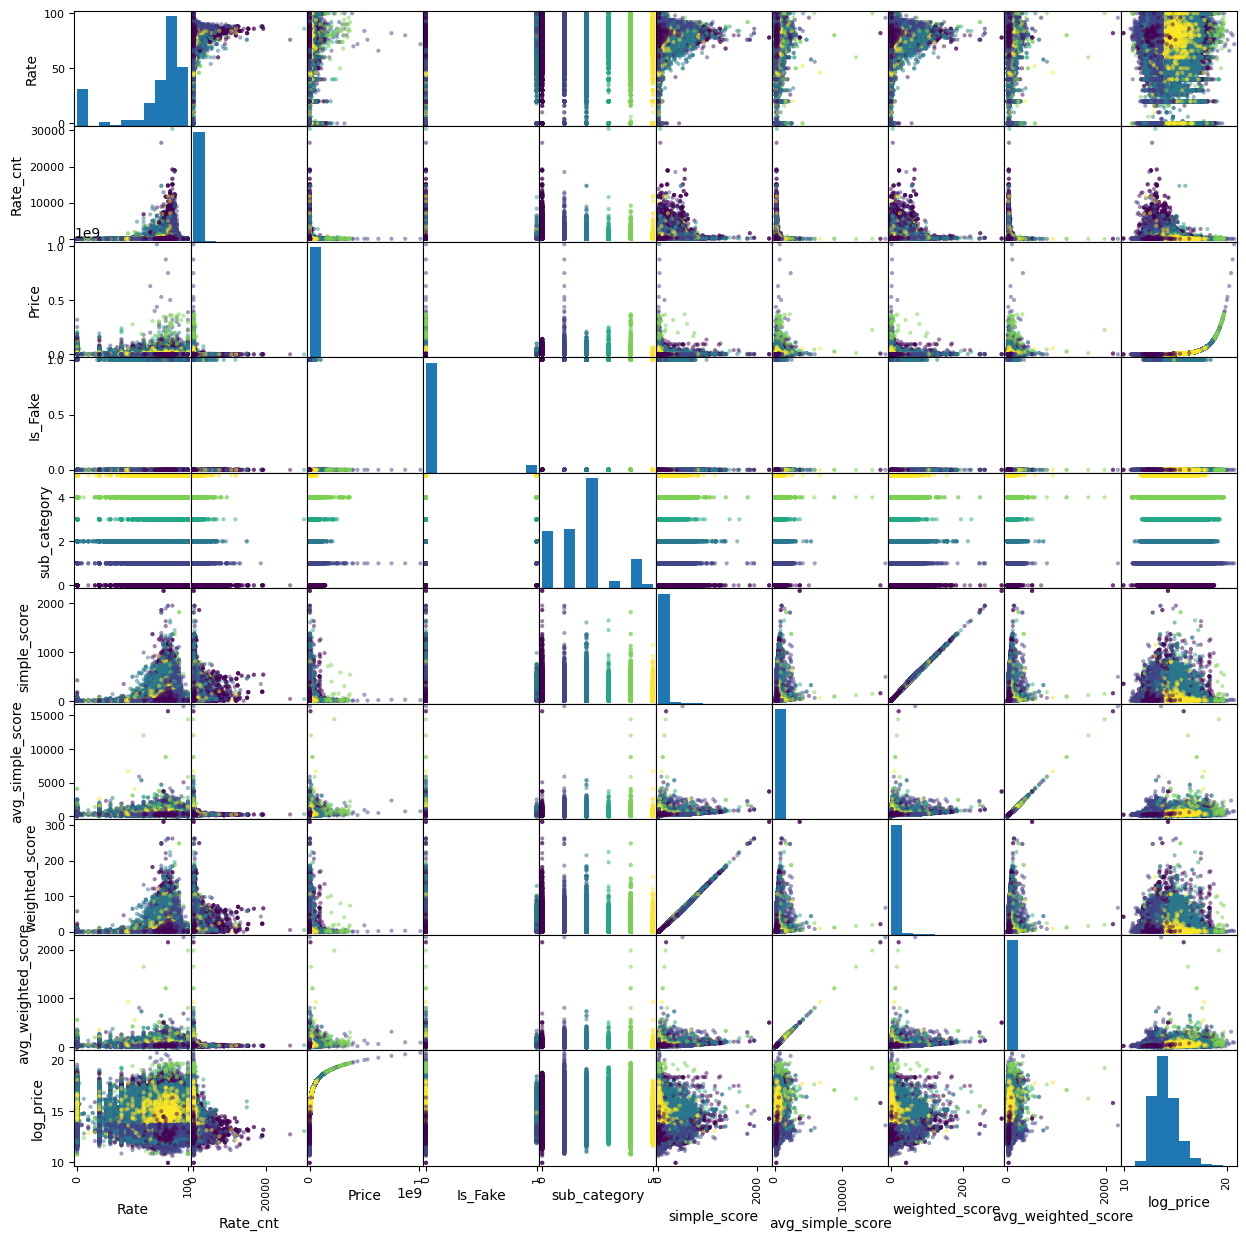

In [34]:
scatter_matrix = pd.plotting.scatter_matrix(clustering_df, figsize=(15, 15), c=clustering_df.sub_category)
plt.show()

boxplots:

Boxplots are excellent for comparing the distributions of numerical data across different categories. They show the median, quartiles, and potential outliers for each category.

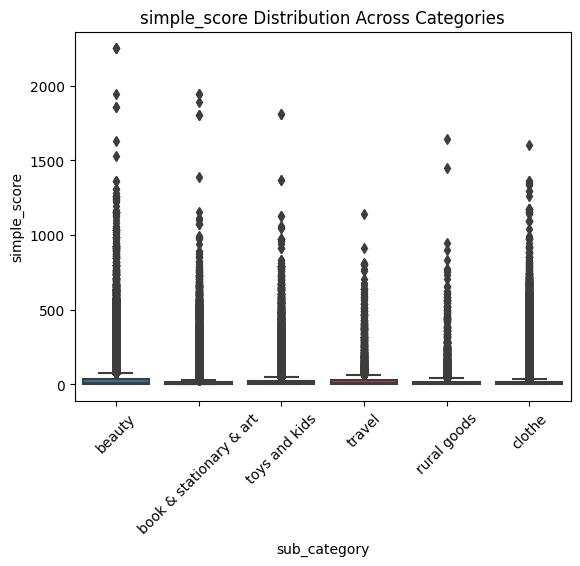

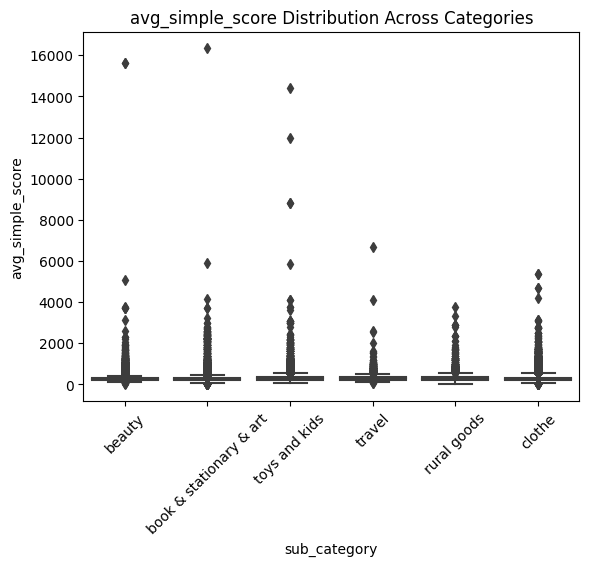

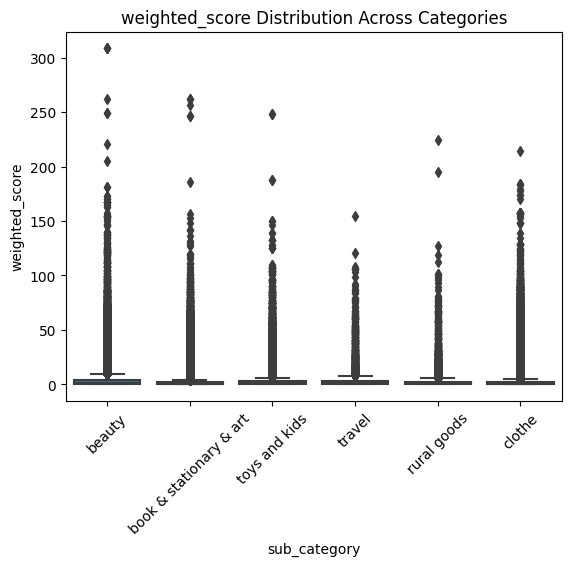

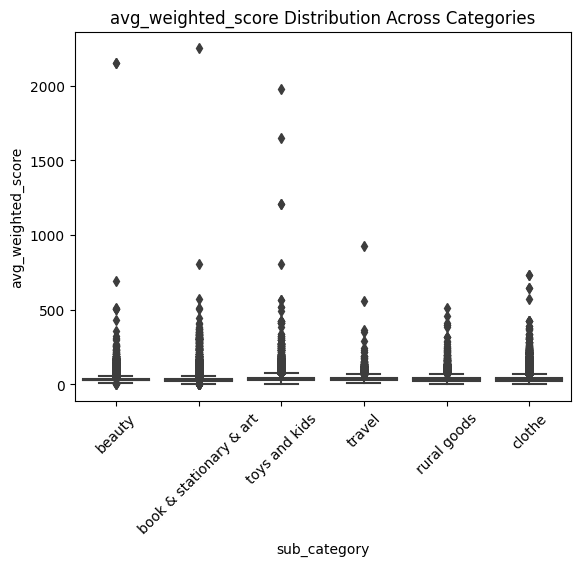

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

for score in ['simple_score', 'avg_simple_score', 'weighted_score', 'avg_weighted_score']:
    sns.boxplot(x='sub_category', y=score, data=df)
    plt.title(f'{score} Distribution Across Categories')
    
    # Rotate x-axis labels to 45 degrees
    plt.xticks(rotation=45)
    
    plt.show()

Violin plots:

Violin plots combine the features of boxplots and kernel density plots. They show the probability density of the data at different values, providing a smooth curve overlay of the boxplot. This can give you a clearer picture of the distribution shapes and overlaps between different categories.

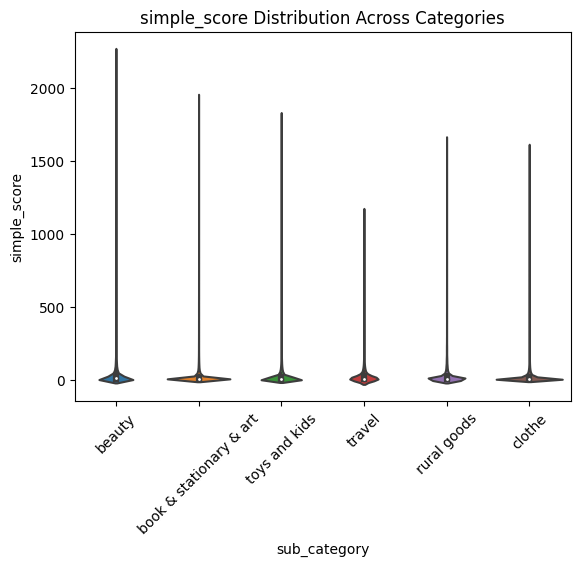

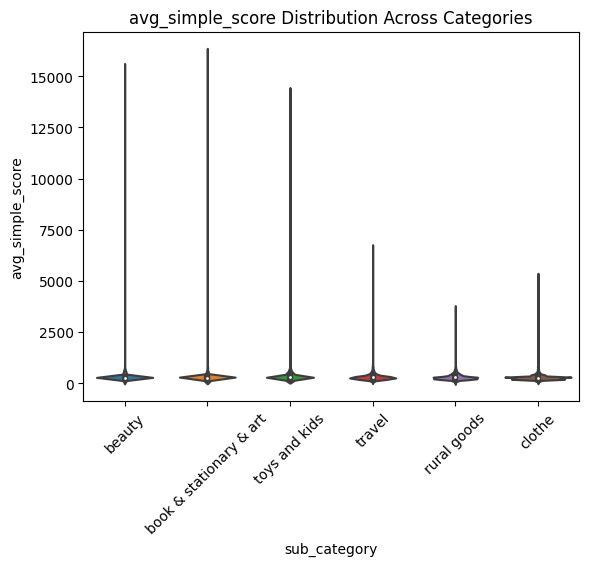

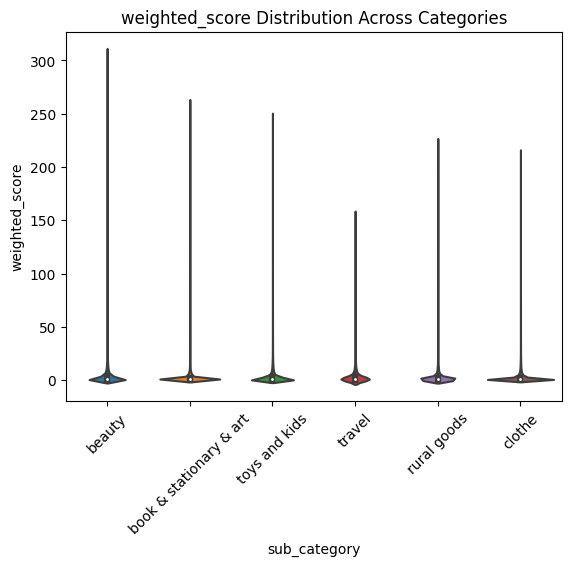

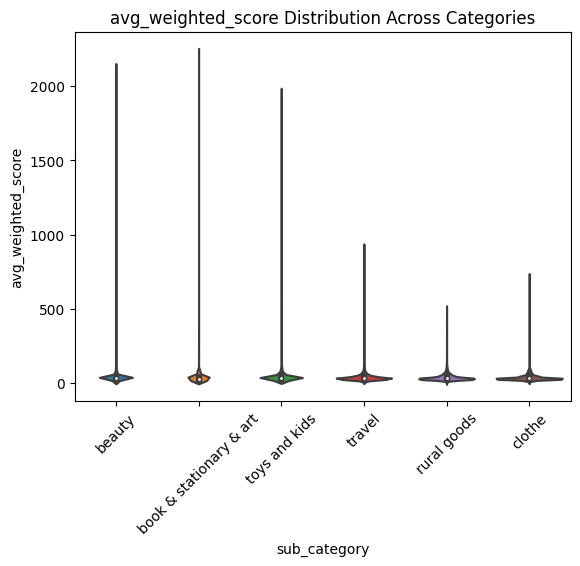

In [31]:
for score in ['simple_score','avg_simple_score','weighted_score','avg_weighted_score']:
    sns.violinplot(x='sub_category', y=score, data=df)
    plt.title(f'{score} Distribution Across Categories')
    plt.xticks(rotation=45)
    plt.show()

Point plot:

Point plots are useful for showing the relationship between two categorical variables and a continuous variable.

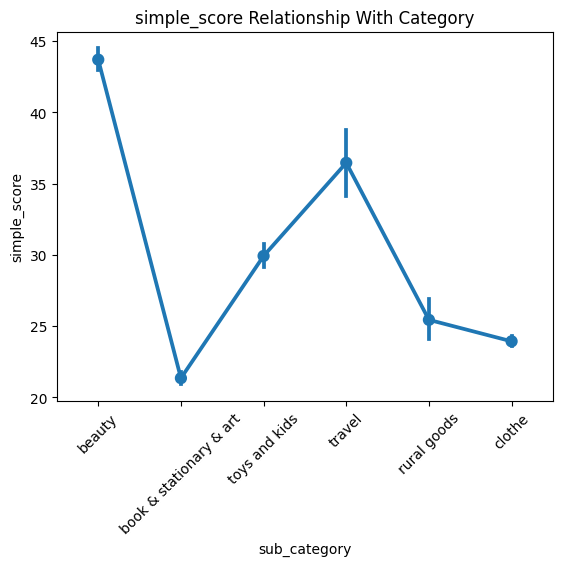

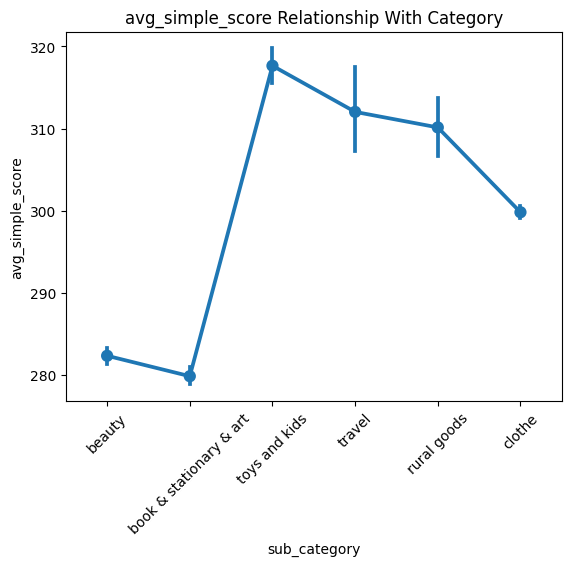

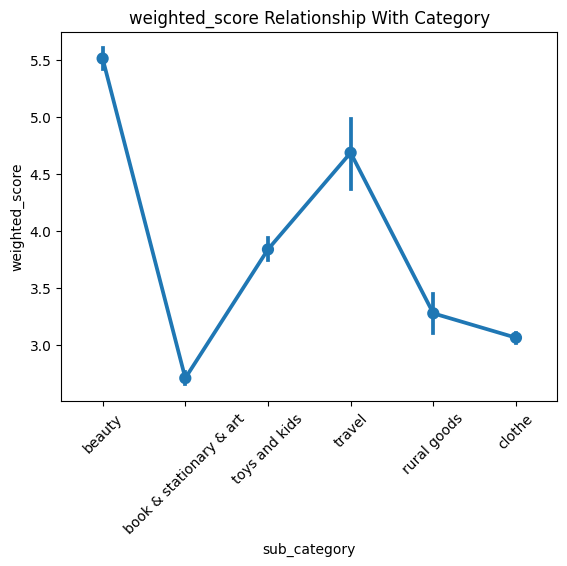

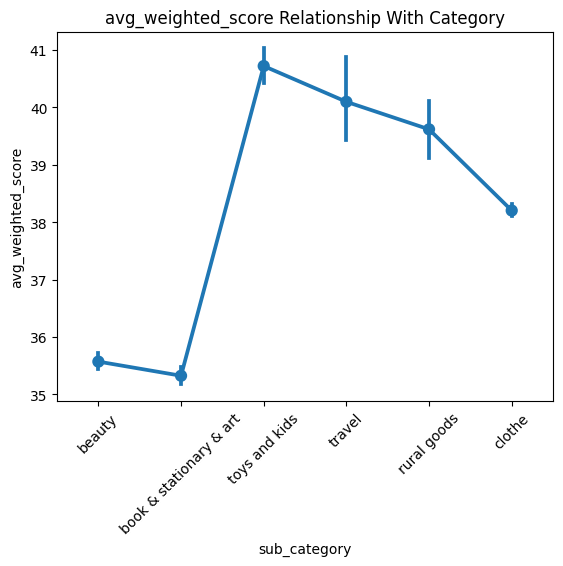

In [32]:
for score in ['simple_score','avg_simple_score','weighted_score','avg_weighted_score']:
    sns.pointplot(x='sub_category', y=score, data=df)
    plt.title(f'{score} Relationship With Category')
    plt.xticks(rotation=45)
    plt.show()


Examining different scores for a specific product: